In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

In [3]:
sample_proportions(sample_size, eligible_population)

array([ 0.36,  0.64])

In [4]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [5]:
one_simulated_count()

21.0

In [6]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

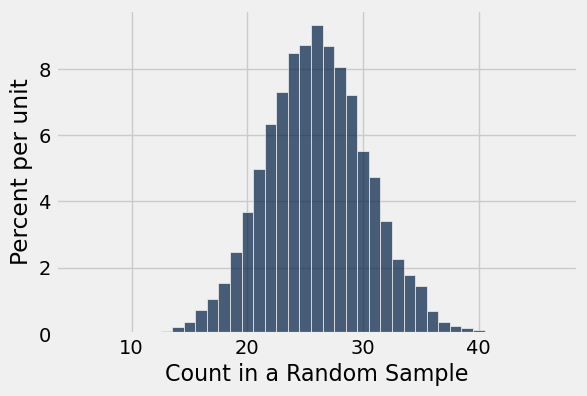

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins =  np.arange(5.5, 46.6, 1))

In [8]:
np.count_nonzero(counts <= 8)

0

---

In [9]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


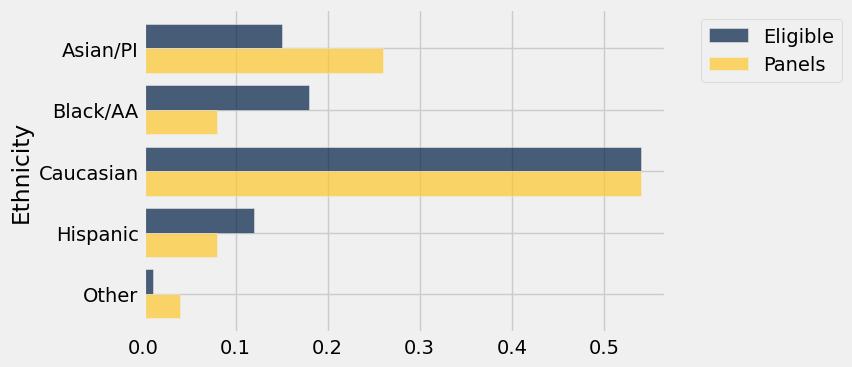

In [10]:
jury.barh('Ethnicity')

In [11]:
model = make_array(0.15, 0.18, 0.54, 0.12, 0.01)

In [12]:
simulated = sample_proportions(1423, model)
simulated

array([ 0.14406184,  0.17146873,  0.54532677,  0.12860155,  0.01054111])

In [13]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian/PI,0.15,0.26,0.144062
Black/AA,0.18,0.08,0.171469
Caucasian,0.54,0.54,0.545327
Hispanic,0.12,0.08,0.128602
Other,0.01,0.04,0.0105411


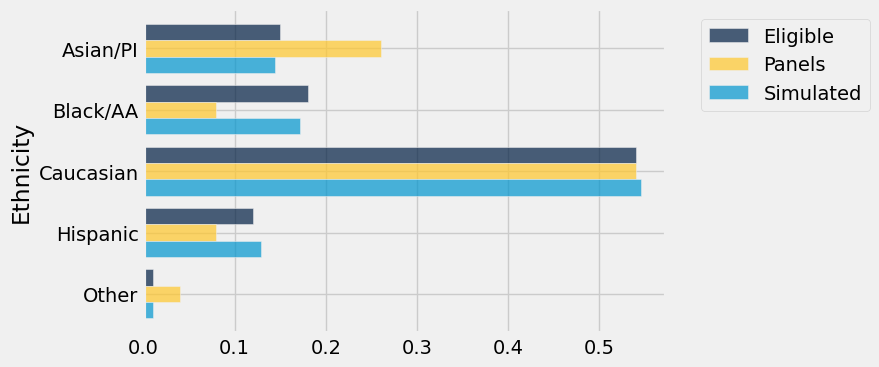

In [14]:
jury_with_simulated.barh('Ethnicity')

In [15]:
# we need a new statistic to measure the diffrence between the distributions!

In [16]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [17]:
sum(jury_with_difference.where('Difference', are.above(0)).column('Difference'))

0.14000000000000001

In [18]:
sum(abs(jury_with_difference.column('Difference'))) / 2

0.14000000000000001

In [19]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2)) / 2

In [20]:
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [21]:
simulated_tvd = tvd(sample_proportions(1423, model), jury.column('Eligible'))
simulated_tvd

0.021475755446240388

In [22]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

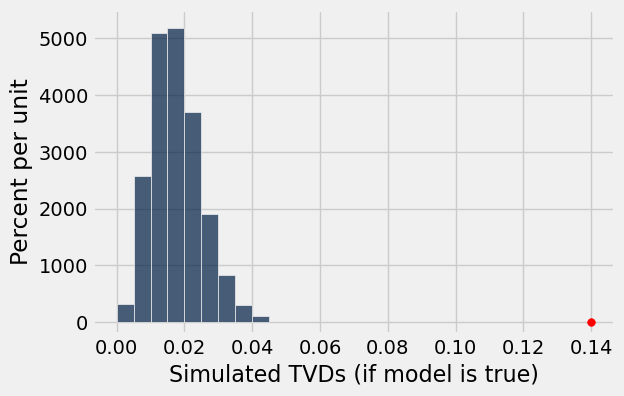

In [23]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)

# Plotting details; ignore this code
plt.ylim(-2, 55)
plt.scatter(obsvd_tvd, 0, color='red', s=30);

In [24]:
np.count_nonzero(tvds >= 0.14)

0

---

In [25]:
705/929

0.7588805166846071

In [26]:
observed_statistic = abs (100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

In [27]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)

sample_proportions(929, mendel_proportions)

array([ 0.76533907,  0.23466093])

In [28]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

one_simulated_distance()

0.8880516684607098

In [29]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

In [30]:
dists = Table().with_column(
    'Distance between Sample % and 75%', distances
)
dists

Distance between Sample % and 75%
2.28741
2.71798
0.672766
0.672766
0.672766
1.04952
1.04952
1.48009
0.618945
0.511302


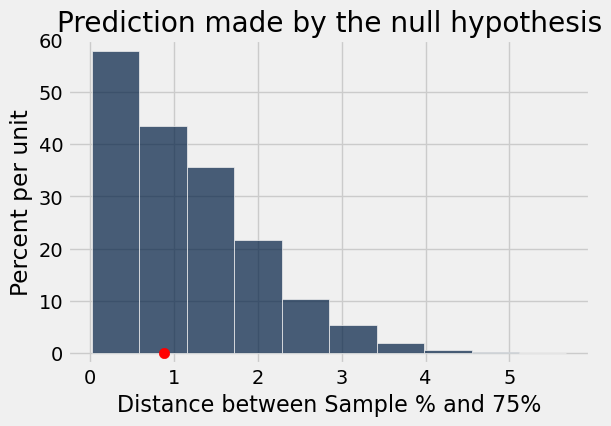

In [31]:
dists.hist()
plt.title('Prediction made by the null hypothesis')

plt.ylim(-.02, .6)
plt.scatter(observed_statistic, 0, color='red', s=55);

In [36]:
np.count_nonzero(distances >= observed_statistic) / repetitions

0.5394

In [37]:
# ^ a p-value

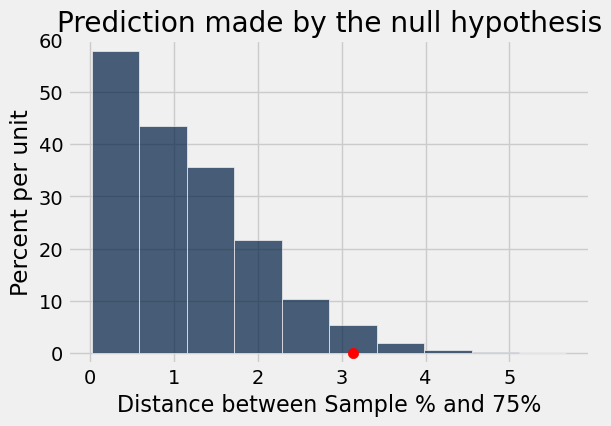

In [33]:
different_observed_statistic = 3.14

dists.hist()
plt.title('Prediction made by the null hypothesis')

plt.ylim(-.02, .6)
plt.scatter(different_observed_statistic, 0, color='red', s=55);

In [35]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0288